In [1]:
"""author:- Akshay gupta 
email id:-gakshaygupta@hotmail.com phone no:-9175146842"""
import librosa #library to process audio files and extract features
import numpy 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler #module to normalize the data
import metadata # read Readme.md for info
from librosa import display #module to plot amplitude vs time graph

    

mean=-4.622976431558195,var=1266.6560654265716


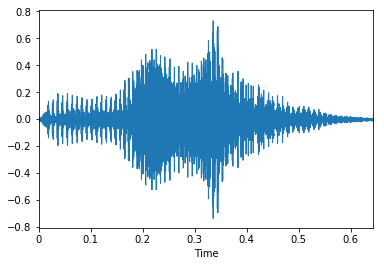

In [2]:
#visualizing the data
X1,sr1=librosa.load(r'recordings\0_jackson_0.wav')
plt.figure(figsize=(12,4))#resizing the window
%matplotlib inline
display.waveplot(X1,sr1)
mfccs=mfccs = np.mean(librosa.feature.mfcc(y=X1, sr=sr1, n_mfcc=100).T,axis=0)
print("mean={0},var={1}".format(np.mean(mfccs),np.var(mfccs)))


mean=1.760548244865806,var=684.7868665649157


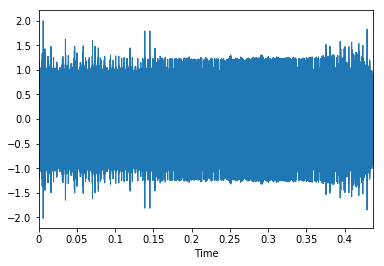

In [3]:
X2,sr2=librosa.load(r'recordings\0_nicolas_0.wav')
plt.figure(figsize=(12,4))#resizing the window
%matplotlib inline
display.waveplot(X2,sr2)
mfccs=mfccs = np.mean(librosa.feature.mfcc(y=X2, sr=sr2, n_mfcc=100).T,axis=0)
print("mean={0},var={1}".format(np.mean(mfccs),np.var(mfccs)))
#As we can see that data is skewed there is need of normalization of the data

In [4]:
#loading the data 
labels=[]
a=[]
for i in metadata.metadata.keys():
    for k in range(0,10):
        for j in range(0,50):

            X,sr=librosa.load(r'recordings\{0}_{1}_{2}.wav'.format(k,i,j))
            """ extracting Mel-frequency cepstral coefficients as the features of our audio file"""
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=100).T,axis=0)
            """normalizing the mfccs as there are different types of speakers due to which there is much difference between 
            mean and varience of the mfccs data which will deteriorate our model's accuracy """
            s=StandardScaler()
            mfccs=s.fit_transform(mfccs.reshape(-1,1) )
            a.append(mfccs)
            labels.append(k)
a=np.array(a) 
a=a.reshape(-1,100)   
print("Data loaded")
            
    

Data loaded


In [7]:
#test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(a, labels, test_size=0.2,random_state=2)
#model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 30, metric = 'minkowski', p = 1)

classifier.fit(X_train, y_train)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)



In [8]:
#metrics 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import accuracy_score
z=accuracy_score(y_test,y_pred)
print("accuracy :-"+str(z*100))

[[30  0  0  0  0  0  0  0  0  0]
 [ 0 25  0  0  0  0  0  1  0  3]
 [ 0  0 26  1  0  0  0  0  0  0]
 [ 0  0  6 23  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  1  1  0]
 [ 0  0  0  0  0  0 28  0  0  0]
 [ 0  0  0  0  0  0  2 24  0  3]
 [ 0  0  0  0  0  0  1  0 28  0]
 [ 1  2  0  0  0  0  0  1  0 29]]
accuracy :-92.33333333333333
